# CLICK THROUGH RATE PREDICTION

In [1]:
#IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier


import os
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

In [2]:
#LOAD AND READ DATASET
df1 = pd.read_csv("data.csv")
df1.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [3]:
#READING LAST 5 ROWS OF DATASET
df1.tail()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
99994,False,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,1973,3,39,100148,23,10,3,23,15,0
99995,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2545,0,167,100084,221,10,2,29,0,0
99996,True,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,...,2443,2,39,-1,23,10,2,22,15,1
99997,True,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,2295,2,35,100081,23,10,5,25,8,1
99998,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2617,0,35,-1,51,10,1,28,1,0


In [4]:
#CHECKING DATASET
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [5]:
#CHECKING FOR NULL VALUES
df1.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [6]:
#CHECKING FOR NUMBER OF UNIQUE ENTRIES IN EACH COLUMN
df1.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

In [7]:
#CHECKING SHAPE OF DATAFRAME
df1.shape

(99999, 27)

In [8]:
#DROPPING DUPLICATES
df = df1.drop_duplicates()
df.shape

(99341, 27)

In [9]:
#CHECKING COLUMNS IN DATAFRAME
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [10]:
#DROPPING UNNECESSARY COLUMNS
df = df.drop(['click','device_ip'], axis=1)
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [11]:
#CHECKING STATISTICAL INFORMATION
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.0,99341.000000,99341.000000,99341.000000,99341.000000
mean,1004.967264,0.290213,1.016458,0.329220,18846.561903,318.828882,60.338913,2113.226392,1.436627,226.056694,53294.197975,82.952185,10.0,2.593169,25.483828,11.310365,0.170836
std,1.094744,0.506145,0.532553,0.855082,4942.636368,21.578787,47.848698,607.163618,1.325966,350.392948,49952.107818,70.049904,0.0,1.725398,2.965049,5.940158,0.376367
min,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,100.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


# EDA

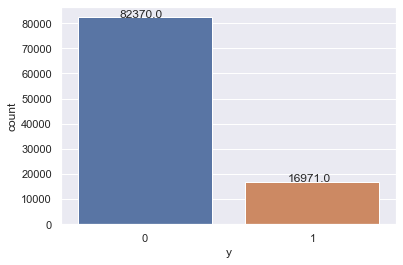

In [12]:
#DISPLAYING TARGET VARIABLE COUNT
sns.set_theme(style="darkgrid")
ax = sns.countplot(df['y'],data=df)

#Iterate the returned axes of the countplot and show the count values at the top of the bars.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

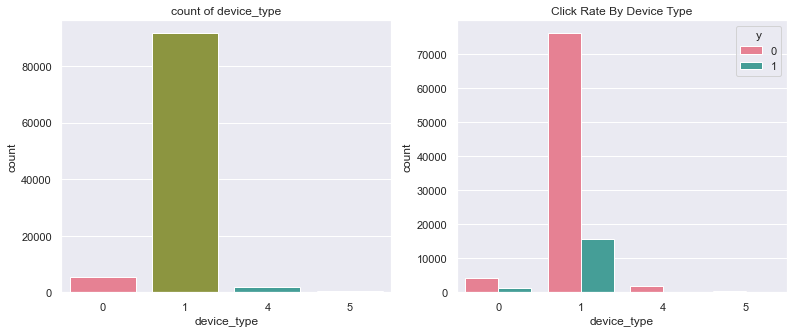

In [13]:
#UNIVARIATE ANALYSIS OF DEVICE TYPE
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['device_type'],palette='husl')
plt.title("count of device_type")
plt.subplot(1,2,2)
sns.countplot(df['device_type'], hue = df['y'],palette="husl")
plt.title("Click Rate By Device Type")
plt.show()

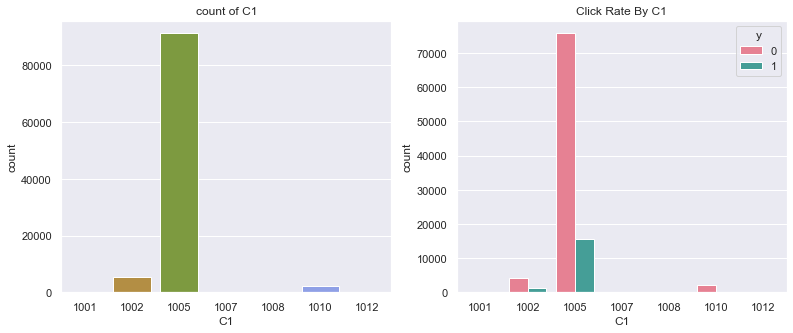

In [14]:
#UNIVARIANT ANALYSIS
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['C1'],palette='husl')
plt.title("count of C1")
plt.subplot(1,2,2)
sns.countplot(df['C1'], hue = df['y'],palette="husl")
plt.title("Click Rate By C1")
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

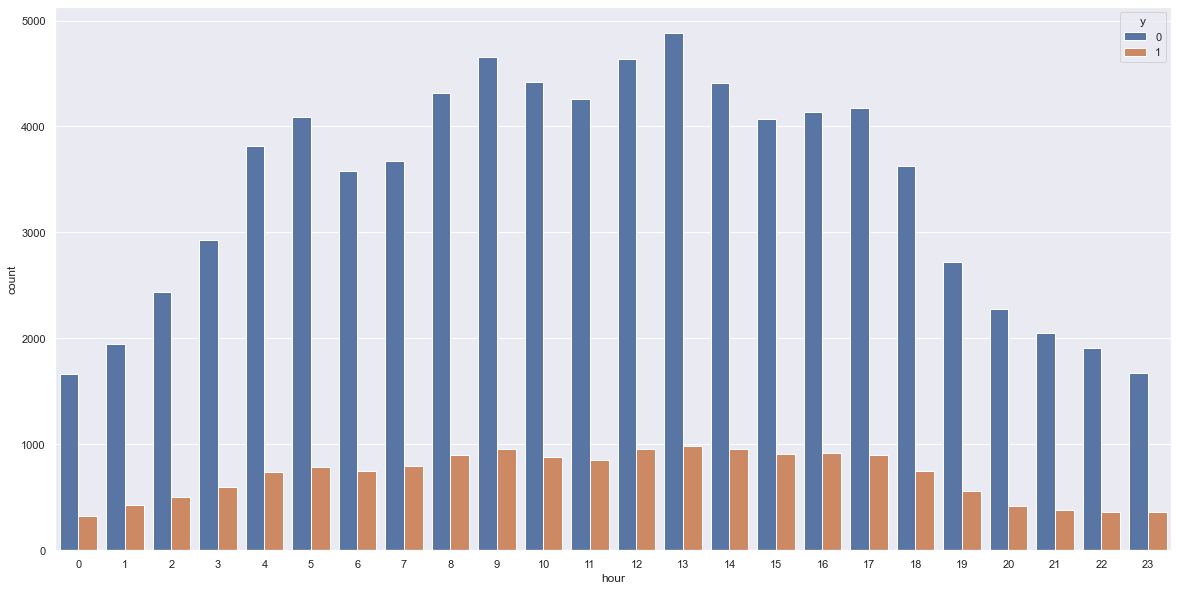

In [15]:
#Hour VS Click
plt.figure(figsize=(20,10))
sns.countplot(x='hour',hue='y',data=df)

Text(0.5, 1.05, 'Pearson correlation of Features')

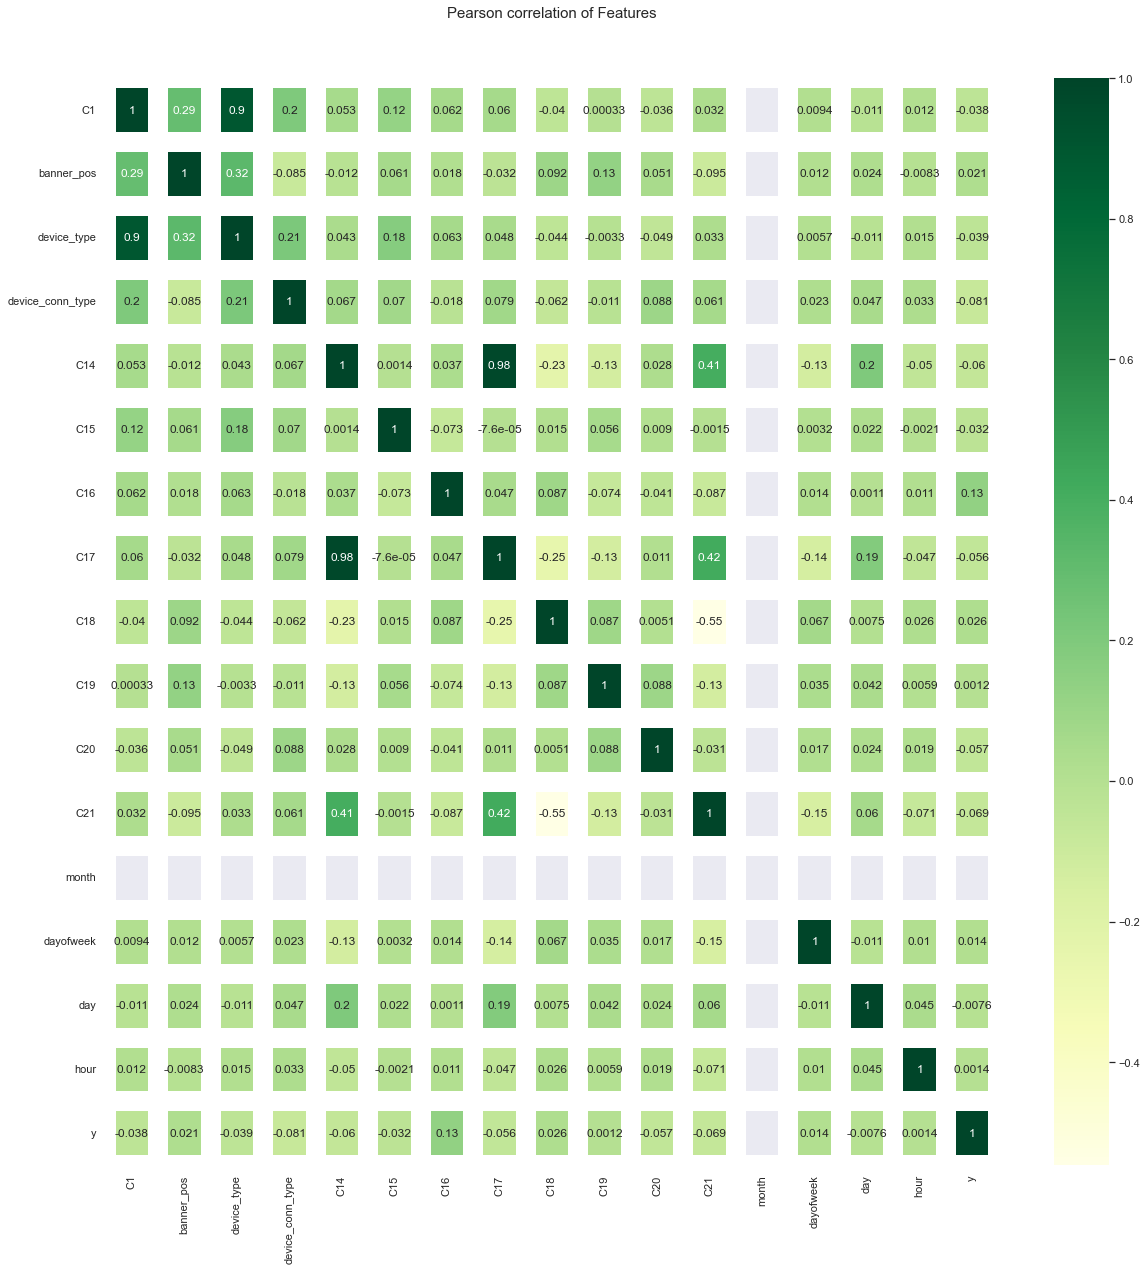

In [16]:
#HEATMAP
corr = df.corr()

f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(corr, ax=ax, annot=True,linewidths=20,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

# PREPROCESSING

In [17]:
#SEPERATING INDEPENDENT AND DEPENDANT VARIABLE
df_x=df.drop(['y'],axis=1) #contain all  independent variable
y=df['y'] 

In [18]:
df_x.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,be6db1d7,...,50,2528,0,39,100075,221,10,1,28,14
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,1b13b020,...,50,1934,2,39,-1,16,10,2,22,19
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,9a45a8e8,...,50,2552,3,167,100202,23,10,3,23,18
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,ea6abc60,...,50,2478,3,167,100074,23,10,2,22,19
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,36d749e5,...,50,1722,0,35,-1,79,10,1,21,8


In [19]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()
df_x['site_category'] = labelEncoder.fit_transform(df_x['site_category'])
df_x['app_category'] = labelEncoder.fit_transform(df_x['app_category'])
df_x['site_id'] = labelEncoder.fit_transform(df_x['site_id'])
df_x.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
0,1005,1,784,58a89a43,17,ecad2386,7801e8d9,0,a99f214a,be6db1d7,...,50,2528,0,39,100075,221,10,1,28,14
1,1005,1,1287,7e091613,17,ecad2386,7801e8d9,0,a99f214a,1b13b020,...,50,1934,2,39,-1,16,10,2,22,19
2,1005,0,1293,d262cf1e,1,ecad2386,7801e8d9,0,a99f214a,9a45a8e8,...,50,2552,3,167,100202,23,10,3,23,18
3,1002,0,80,248e439f,5,ecad2386,7801e8d9,0,0fa578fd,ea6abc60,...,50,2478,3,167,100074,23,10,2,22,19
4,1005,0,179,f3845767,1,ecad2386,7801e8d9,0,a99f214a,36d749e5,...,50,1722,0,35,-1,79,10,1,21,8


In [20]:
#CREATING DUMMY VARIABLES
df_x = pd.get_dummies(df_x, columns=["banner_pos"])
df_x.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,device_type,...,dayofweek,day,hour,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7
0,1005,784,58a89a43,17,ecad2386,7801e8d9,0,a99f214a,be6db1d7,1,...,1,28,14,0,1,0,0,0,0,0
1,1005,1287,7e091613,17,ecad2386,7801e8d9,0,a99f214a,1b13b020,1,...,2,22,19,0,1,0,0,0,0,0
2,1005,1293,d262cf1e,1,ecad2386,7801e8d9,0,a99f214a,9a45a8e8,1,...,3,23,18,1,0,0,0,0,0,0
3,1002,80,248e439f,5,ecad2386,7801e8d9,0,0fa578fd,ea6abc60,0,...,2,22,19,1,0,0,0,0,0,0
4,1005,179,f3845767,1,ecad2386,7801e8d9,0,a99f214a,36d749e5,1,...,1,21,8,1,0,0,0,0,0,0


In [21]:
#CHECKING NUMBER OF UNIQUE ENTRIES
df_x.nunique()

C1                      7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
banner_pos_0            2
banner_pos_1            2
banner_pos_2            2
banner_pos_3            2
banner_pos_4            2
banner_pos_5            2
banner_pos_7            2
dtype: int64

In [22]:
#CHECKING INFO
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                99341 non-null  int64 
 1   site_id           99341 non-null  int64 
 2   site_domain       99341 non-null  object
 3   site_category     99341 non-null  int64 
 4   app_id            99341 non-null  object
 5   app_domain        99341 non-null  object
 6   app_category      99341 non-null  int64 
 7   device_id         99341 non-null  object
 8   device_model      99341 non-null  object
 9   device_type       99341 non-null  int64 
 10  device_conn_type  99341 non-null  int64 
 11  C14               99341 non-null  int64 
 12  C15               99341 non-null  int64 
 13  C16               99341 non-null  int64 
 14  C17               99341 non-null  int64 
 15  C18               99341 non-null  int64 
 16  C19               99341 non-null  int64 
 17  C20         

In [23]:
#CHECKING STATS
df_x.describe()

,C1,site_id,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,...,dayofweek,day,hour,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7
count,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,...,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000
mean,1004.967264,715.915704,8.006030,2.204769,1.016458,0.329220,18846.561903,318.828882,60.338913,2113.226392,...,2.593169,25.483828,11.310365,0.717569,0.280730,0.000302,0.000040,0.000191,0.000091,0.001077
std,1.094744,362.604352,6.389386,4.850637,0.532553,0.855082,4942.636368,21.578787,47.848698,607.163618,...,1.725398,2.965049,5.940158,0.450184,0.449358,0.017375,0.006345,0.013828,0.009518,0.032802
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,...,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1005.000000,548.000000,3.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,...,1.000000,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1005.000000,787.000000,5.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,...,2.000000,26.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1005.000000,787.000000,17.000000,2.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,...,4.000000,28.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1012.000000,1484.000000,18.000000,20.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,...,6.000000,30.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#FUNCTION TO TREAT OUTLIERS
def outlier_detect(df_x):
    for i in df_x.describe().columns:
        Q1=df_x.describe().at['25%',i]
        Q3=df_x.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df_x[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df_x[i].median())
            else:
                p.append(j)
        df_x[i]=p
    return df_x

In [25]:
#REMOVING OUTLIERS
df_x_new = outlier_detect(df_x)
df_x_new.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,device_type,...,dayofweek,day,hour,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7
0,1005.0,784.0,58a89a43,17,ecad2386,7801e8d9,0.0,a99f214a,be6db1d7,1.0,...,1,28,14,0,1,0.0,0.0,0.0,0.0,0.0
1,1005.0,787.0,7e091613,17,ecad2386,7801e8d9,0.0,a99f214a,1b13b020,1.0,...,2,22,19,0,1,0.0,0.0,0.0,0.0,0.0
2,1005.0,787.0,d262cf1e,1,ecad2386,7801e8d9,0.0,a99f214a,9a45a8e8,1.0,...,3,23,18,1,0,0.0,0.0,0.0,0.0,0.0
3,1005.0,787.0,248e439f,5,ecad2386,7801e8d9,0.0,0fa578fd,ea6abc60,1.0,...,2,22,19,1,0,0.0,0.0,0.0,0.0,0.0
4,1005.0,787.0,f3845767,1,ecad2386,7801e8d9,0.0,a99f214a,36d749e5,1.0,...,1,21,8,1,0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_x_new.describe()

,C1,site_id,site_category,app_category,device_type,device_conn_type,C14,C15,C16,C17,...,dayofweek,day,hour,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7
count,99341.0,99341.000000,99341.000000,99341.000000,99341.0,99341.0,99341.000000,99341.0,99341.0,99341.000000,...,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.0,99341.0,99341.0,99341.0,99341.0
mean,1005.0,758.316385,8.006030,0.472141,1.0,0.0,20107.870215,320.0,50.0,2269.258574,...,2.593169,25.483828,11.310365,0.717569,0.280730,0.0,0.0,0.0,0.0,0.0
std,0.0,129.568342,6.389386,0.850953,0.0,0.0,2584.277351,0.0,0.0,341.283104,...,1.725398,2.965049,5.940158,0.450184,0.449358,0.0,0.0,0.0,0.0,0.0
min,1005.0,190.000000,0.000000,0.000000,1.0,0.0,9461.000000,320.0,50.0,898.000000,...,0.000000,21.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,1005.0,787.000000,3.000000,0.000000,1.0,0.0,17875.000000,320.0,50.0,1993.000000,...,1.000000,23.000000,7.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,1005.0,787.000000,5.000000,0.000000,1.0,0.0,20346.000000,320.0,50.0,2323.000000,...,2.000000,26.000000,11.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,1005.0,787.000000,17.000000,0.000000,1.0,0.0,21893.000000,320.0,50.0,2526.000000,...,4.000000,28.000000,16.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0
max,1005.0,1145.000000,18.000000,5.000000,1.0,0.0,24043.000000,320.0,50.0,2757.000000,...,6.000000,30.000000,23.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
#CREATING A COPY
x = df_x_new.copy()

In [28]:
#SPLITTING DATASET INTO TRAIN AND TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(69538, 30) (29803, 30) (69538,) (29803,)


In [29]:
#HASHING
num_cols = x.select_dtypes(include = ['int','float']).columns.tolist()
categorical_cols = x.select_dtypes(include = ['object']).columns.tolist()
print(num_cols)
print(categorical_cols)

['C1', 'site_id', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4', 'banner_pos_5', 'banner_pos_7']
['site_domain', 'app_id', 'app_domain', 'device_id', 'device_model']


In [30]:
#HASHING
for col in categorical_cols:
    x_train[col] = x_train[col].apply(lambda x: hash(x))
    
for col in categorical_cols:
    x_test[col] = x_test[col].apply(lambda x:hash(x))

In [31]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train[num_cols] = std.fit_transform(x_train[num_cols])
x_test[num_cols] = std.transform(x_test[num_cols])

# MODELLING

### Choosing a suitable metric to evaluate model performance
Since there is a considerable class imbalance as can be seen from the data, blindly predicting everything to be 0 will result in the prediction being correct 83% of the time. So Accuracy, Precision, Recall scores will be chosen as the metric for evaluating model performance as optimizing Recall and Precision score will lead to minimizing false-positives and false-negatives which is very desireable in this case.

Chose logistic regression, random forest and desicion tree for modelling because of accuracy

## LOGISTIC REGRESSION

In [32]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)
lr_probability =model.predict_proba(x_test)[:,1]


recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("Accuracy : ", accuracy_score(y_test,pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8312250444586116
Precision: 0.000000, Recall: 0.000000


In [33]:
matrix = confusion_matrix(y_test,pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24773     0]
 [ 5030     0]]


## RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]



recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8133073851625675
Precision: 0.369374, Recall: 0.150099


In [35]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[23484  1289]
 [ 4275   755]]


## DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(x_train,y_train)
print('Train Score:',tree.score(x_train,y_train))
print('Test Score:',tree.score(x_test,y_test))

Train Score: 0.8382754752797031
Test Score: 0.8277019092037714


In [37]:
y_pred = tree.predict(x_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8277019092037714
Precision: 0.772889, Recall: 0.827702


In [38]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24262   511]
 [ 4624   406]]


In [39]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(x_train,y_train).predict(x_test) 
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    prec = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[24255   518]
 [ 4626   404]]
Precision: 0.7720374321686664, Recall: 0.827399926181928
Evaluating tree with max_depth = 3
Confusion matrix: 
[[24258   515]
 [ 4626   404]]
Precision: 0.7722926756621916, Recall: 0.8275005871892092
Evaluating tree with max_depth = 5
Confusion matrix: 
[[24278   495]
 [ 4631   399]]
Precision: 0.773394904978076, Recall: 0.8280038922256149
Evaluating tree with max_depth = 10
Confusion matrix: 
[[24280   493]
 [ 4629   401]]
Precision: 0.7738299839015398, Recall: 0.8281381069019897
Evaluating tree with max_depth = 15
Confusion matrix: 
[[24261   512]
 [ 4625   405]]
Precision: 0.7726765412067705, Recall: 0.827634801865584
Evaluating tree with max_depth = 20
Confusion matrix: 
[[24265   508]
 [ 4629   401]]
Precision: 0.7725116578564982, Recall: 0.827634801865584


In [40]:
#CROSS VALIDATION
from sklearn.model_selection import KFold,cross_val_score
for max_depth_val in [3, 5, 10]:
    k_fold = KFold(n_splits = 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred = tree.fit(x_train, y_train).predict(x_test) 
  
    cv_precision = cross_val_score(clf, x_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    precision = recall_score(y_test, y_pred, average = 'weighted')
    print("Cross validation Recall: %s" %(cv_precision.mean()))
    print("Test Recall: %s" %(precision.mean()))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: 0.82828091537301
Test Recall: 0.828104553232896
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: 0.8293450742840897
Test Recall: 0.8274334798510217
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: 0.8247576457665858
Test Recall: 0.8276012481964903


Decision tree turned out to be the best performing model

[0.         0.05107931 0.26597654 0.06860662 0.0293214  0.04458515
 0.00201919 0.02986944 0.08257412 0.         0.         0.08094109
 0.         0.         0.0311908  0.01864424 0.01636509 0.05545851
 0.1103724  0.         0.02236718 0.02863347 0.05633228 0.00455553
 0.00110764 0.         0.         0.         0.         0.        ]


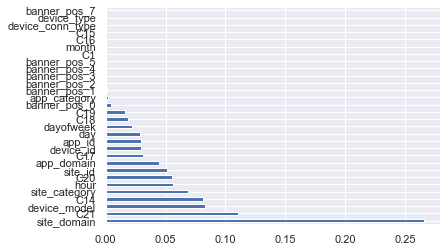

In [41]:
#FEATURE IMPORTANCE
print(tree.feature_importances_) #use inbuilt class feature_importances
#plot graph of feature importances for better visualization
feat_importances = pd.Series(tree.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [42]:
x_train.columns

Index(['C1', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'month', 'dayofweek', 'day', 'hour', 'banner_pos_0',
       'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7'],
      dtype='object')

In [43]:
#DROPPING LESS IMPORTANT FEATURES

x_train = x_train.drop(['C1','device_type','device_conn_type', 'C15', 'C16',
                        'month','banner_pos_2', 'banner_pos_3', 'banner_pos_4',
                        'banner_pos_5', 'banner_pos_7'],axis=1)

x_test = x_test.drop(['C1','device_type','device_conn_type', 'C15', 'C16',
                        'month','banner_pos_2', 'banner_pos_3', 'banner_pos_4',
                        'banner_pos_5', 'banner_pos_7'],axis=1)
    

In [44]:
x_test.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_model,C14,C17,C18,C19,C20,C21,dayofweek,day,hour,banner_pos_0,banner_pos_1
31215,-1.516450,-3238199575215849539,-0.784766,8301681399076563453,7367005976233949795,-0.555137,-141021805497487128,-2723244751516733379,-0.005247,0.075717,0.426310,-0.541337,0.939579,-0.905428,0.233573,-0.839038,1.126397,1,0
94816,-0.377678,-4099880013920593714,1.405222,8301681399076563453,7367005976233949795,-0.555137,-141021805497487128,-329529002855961799,0.642640,0.693740,-1.081484,-0.541337,0.941000,2.352398,-0.345658,-1.176172,-0.219738,1,0
31689,0.218822,-8921422914045551775,1.405222,8301681399076563453,7367005976233949795,-0.555137,-141021805497487128,-247930965113259665,1.047617,1.106732,0.426310,-0.484282,0.941000,-0.905428,0.233573,1.520898,-0.051471,0,1
58143,0.218822,9117086728360207935,-0.471911,4378086352125358496,6484253792380827711,1.795273,-141021805497487128,7496817164390271540,0.603573,0.658592,1.180207,-0.484282,-1.063504,1.258352,-0.345658,-1.176172,-1.229339,1,0
96160,0.218822,-4752988565384319623,-1.097622,8301681399076563453,7367005976233949795,-0.555137,-141021805497487128,-1100970032455413284,-1.702903,-1.602610,-1.081484,-0.541337,-1.063504,0.456052,0.812804,-0.501904,0.789863,1,0


In [45]:
#FEATURE ENGINEERING
x_train['id_info'] =  x_train.app_id + x_train.site_id
x_train = x_train.drop(['app_id','site_id'],axis=1)
    
x_train['domain_info'] = x_train.app_domain + x_train.site_domain
x_train = x_train.drop(['app_domain','site_domain'],axis=1)


x_test['id_info'] =  x_test.app_id + x_test.site_id
x_test = x_test.drop(['app_id','site_id'],axis=1)
    
x_test['domain_info'] = x_test.app_domain + x_test.site_domain
x_test = x_test.drop(['app_domain','site_domain'],axis=1)


In [46]:
x_test.head()

,site_category,app_category,device_id,device_model,C14,C17,C18,C19,C20,C21,dayofweek,day,hour,banner_pos_0,banner_pos_1,id_info,domain_info
31215,-0.784766,-0.555137,-141021805497487128,-2723244751516733379,-0.005247,0.075717,0.426310,-0.541337,0.939579,-0.905428,0.233573,-0.839038,1.126397,1,0,8.301681e+18,4128806401018100256
94816,1.405222,-0.555137,-141021805497487128,-329529002855961799,0.642640,0.693740,-1.081484,-0.541337,0.941000,2.352398,-0.345658,-1.176172,-0.219738,1,0,8.301681e+18,3267125962313356081
31689,1.405222,-0.555137,-141021805497487128,-247930965113259665,1.047617,1.106732,0.426310,-0.484282,0.941000,-0.905428,0.233573,1.520898,-0.051471,0,1,8.301681e+18,-1554416937811601980
58143,-0.471911,1.795273,-141021805497487128,7496817164390271540,0.603573,0.658592,1.180207,-0.484282,-1.063504,1.258352,-0.345658,-1.176172,-1.229339,1,0,4.378086e+18,-2845403552968515970
96160,-1.097622,-0.555137,-141021805497487128,-1100970032455413284,-1.702903,-1.602610,-1.081484,-0.541337,-1.063504,0.456052,0.812804,-0.501904,0.789863,1,0,8.301681e+18,2614017410849630172


## RE-RUN MODELS

## LOGISTIC REGRESSION

In [47]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)
lr_probability =model.predict_proba(x_test)[:,1]

acc=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
precision=precision_score(y_test,pred)
print("Accuracy : ", accuracy_score(y_test,pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8312250444586116
Precision: 0.000000, Recall: 0.000000


In [48]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24261   512]
 [ 4626   404]]


## RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]


acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8114619333624132
Precision: 0.356271, Recall: 0.145129


In [50]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[23454  1319]
 [ 4300   730]]


## DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(x_train,y_train)
print('Train Score:',tree.score(x_train,y_train))
print('Test Score:',tree.score(x_test,y_test))

Train Score: 0.8370531220339958
Test Score: 0.8286078582693017


In [52]:
y_pred = tree.predict(x_test)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Precision: %f, Recall: %f" %(precision, recall))

Accuracy :  0.8286078582693017
Precision: 0.771381, Recall: 0.828608


In [53]:
matrix = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = matrix.ravel()
print(matrix)

[[24385   388]
 [ 4720   310]]


Decision tree is best performing model.
Feature engineering has improved models accuracy

### Risks of using the model in production

As can be seen from the different models there are a large number of false negatives. That is model predicts actual clicks as 0 which may lead the company to miss out on business opportunity